In [41]:
import pickle
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

In [42]:
### Helper functions

def flatten_list_of_dicts(dicts):
    result = defaultdict(list)
    for d in dicts:
        for key, value in d.items():
            result[key].append(value)
    return dict(result)

def apply_mean_to_all_dict_entries(d: dict):
    for key, value in d.items():
        d[key] = np.mean(value, axis=0)
    return dict(d)

In [43]:
### Define used filenames

gummy_worm_filenames = [
     'Gummy Worm Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250331_182934.pkl',
     'Gummy Worm Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250331_182934.pkl', 
     'Gummy Worm Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250331_182934.pkl',
     'Gummy Worm Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250331_182934.pkl',
    ### 68
    'Gummy Worm Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250529_174129.pkl',
    'Gummy Worm Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250529_174129.pkl',
    'Gummy Worm Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250529_174129.pkl',
    'Gummy Worm Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250529_174129.pkl',
    ### 133
    'Gummy Worm Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250531_212419.pkl',
    'Gummy Worm Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250531_212419.pkl',
    'Gummy Worm Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250531_212419.pkl',
    'Gummy Worm Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250531_212419.pkl',
    ### 97
    'Gummy Worm Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250601_014124.pkl',
    'Gummy Worm Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250601_014124.pkl',
    'Gummy Worm Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250601_014124.pkl',
    'Gummy Worm Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250601_014124.pkl',
    ### 69
    'Gummy Worm Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250602_015227.pkl',
    'Gummy Worm Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250602_135428.pkl',
    'Gummy Worm Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250602_135428.pkl',
    'Gummy Worm Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250602_135428.pkl'
]

exclamation_mark_filenames = [
    'Exclamation Mark Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250513_204432.pkl',
     'Exclamation Mark Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250513_204432.pkl',
     'Exclamation Mark Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250513_204432.pkl',
     'Exclamation Mark Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250513_204432.pkl',
    ### 68
    'Exclamation Mark Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250530_022416.pkl',
    'Exclamation Mark Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250530_022416.pkl',
    'Exclamation Mark Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250530_022416.pkl',
    'Exclamation Mark Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250530_022416.pkl',
    ### 133,
    'Exclamation Mark Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250530_205356.pkl',
    'Exclamation Mark Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250530_205356.pkl',
    'Exclamation Mark Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250530_205356.pkl',
    'Exclamation Mark Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250531_210929.pkl',
    ### 97
    'Exclamation Mark Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250601_170008.pkl',
    'Exclamation Mark Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250601_170008.pkl',
    'Exclamation Mark Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250601_170008.pkl',
    'Exclamation Mark Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250601_170008.pkl',
    ### 69
    'Exclamation Mark Dataset__SVM__Samples_10000__Estimators_132__Folds_5__AbsoluteValues__20250602_015543.pkl',
    'Exclamation Mark Dataset__Neural Network__Samples_10000__Estimators_128__Folds_5__AbsoluteValues__20250602_015543.pkl',
    'Exclamation Mark Dataset__Logistic Regression__Samples_10000__Estimators_168__Folds_5__AbsoluteValues__20250602_015543.pkl',
    'Exclamation Mark Dataset__Random Forest__Samples_10000__Estimators_144__Folds_5__AbsoluteValues__20250602_015543.pkl'
]

models = ["SVM", "Neural Network", "Logistic Regression", "Random Forest"]

In [44]:
### Gather Gummy Worm Results

svm_results = []
nn_results = []
lr_results = []
rf_results = []
for filename in gummy_worm_filenames:
    with (open(f'../grid_search/data/{filename}', 'rb') as file):
        if "SVM" in filename:
            svm_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Neural Network" in filename:
            nn_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Logistic Regression" in filename:
            lr_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Random Forest" in filename:
            rf_results.append(flatten_list_of_dicts(pickle.load(file)))
        else:
            raise ValueError(f"Unknown ML model in filename: {filename}")

In [45]:
### Process Gummy Worm results

svm_results = flatten_list_of_dicts(svm_results)
nn_results = flatten_list_of_dicts(nn_results)
lr_results = flatten_list_of_dicts(lr_results)
rf_results = flatten_list_of_dicts(rf_results)

gummy_worm_resultss = [apply_mean_to_all_dict_entries(svm_results), apply_mean_to_all_dict_entries(nn_results), apply_mean_to_all_dict_entries(lr_results), apply_mean_to_all_dict_entries(rf_results)]

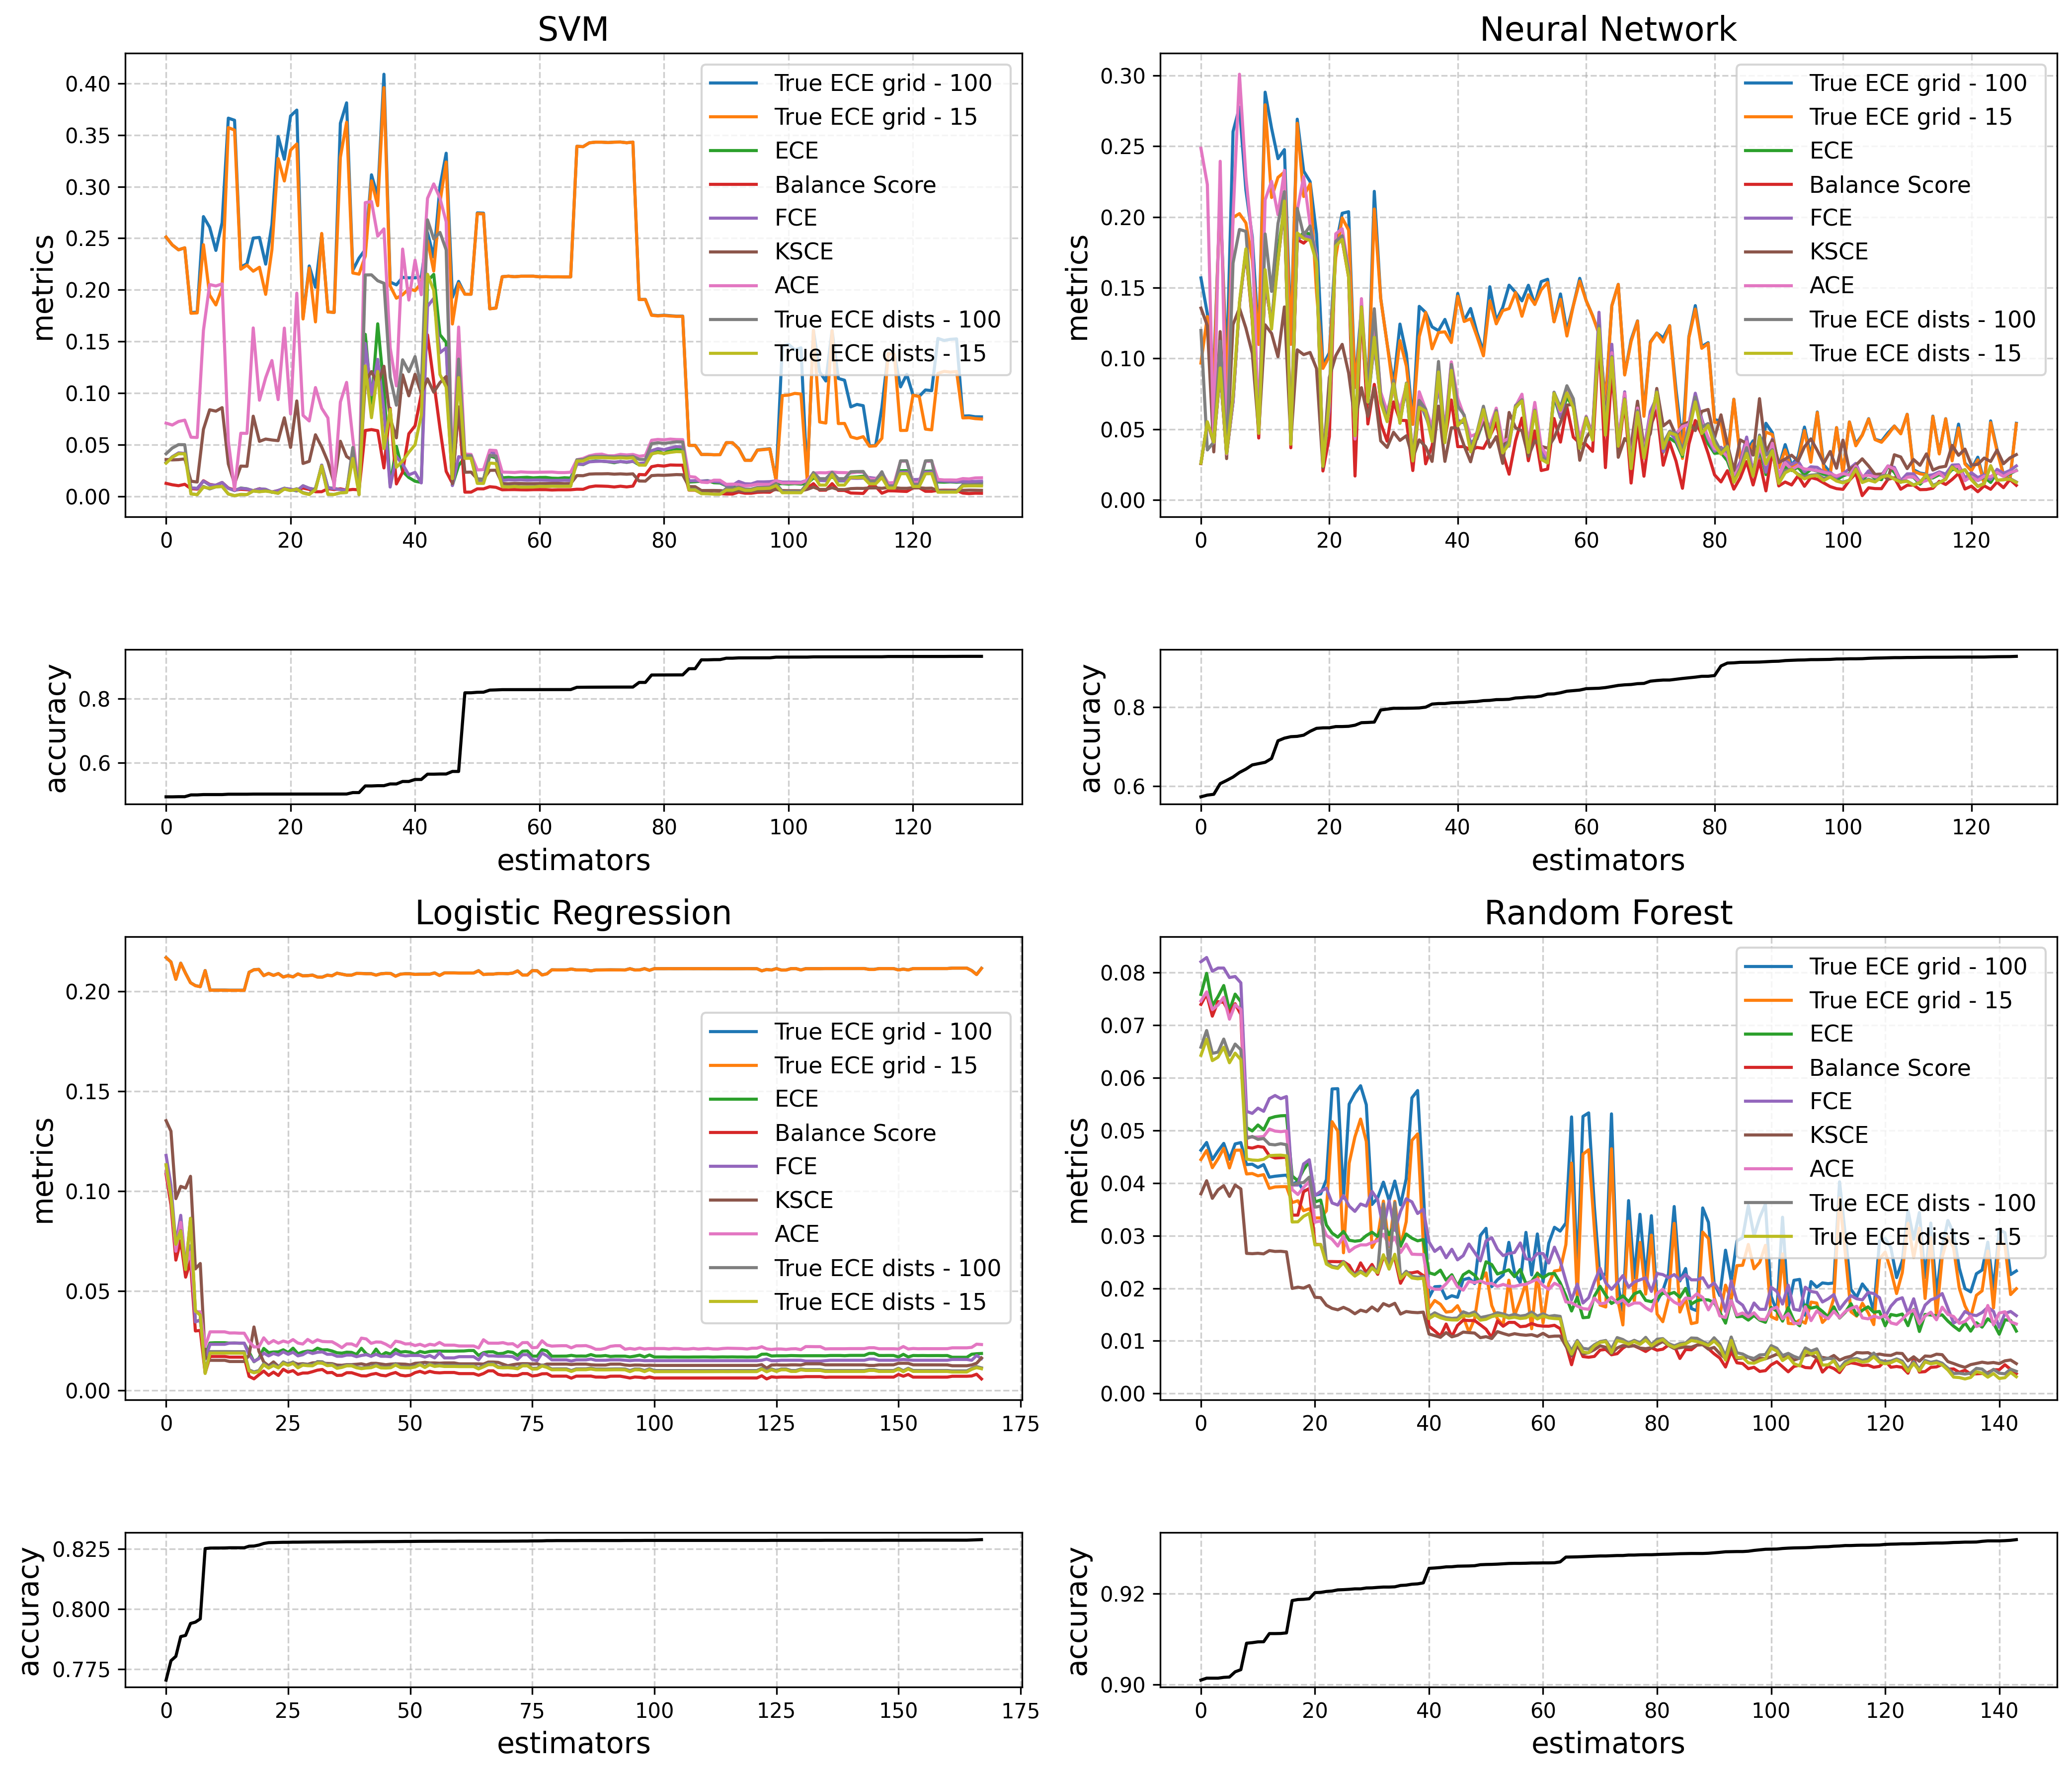

In [46]:
### Plot Gummy Worm Results (Averaged over seeds)

fig = plt.figure(figsize=(14, 12), dpi=300)
gs = GridSpec(4, 2, height_ratios=[3, 1, 3, 1], figure=fig)

for i, results in enumerate(gummy_worm_resultss):
    col = i % 2
    base_row = 0 if i < 2 else 2

    # Plot calibration metrics
    ax = fig.add_subplot(gs[base_row, col])
    ax.set_title(models[i], fontsize=16)
    ax.set_ylabel("metrics", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)

    accuracies = np.array(results["Accuracy"])
    indices = np.argsort(accuracies)

    x_values = range(len(results["ECE"]))
    metric_names = list(results.keys())

    for metric_name, metric in results.items():
        if metric_name not in ["TCE", "Accuracy"]:
            if "True ECE" in metric_name:
                metric_name = metric_name.replace("Grid", "grid").replace("Dists", "dists").replace("(Binned ", "").replace(" Bins)", "")
            ax.plot(x_values, metric[indices], label=metric_name)
    ax.legend(fontsize=11)
    
    # Plot accuracy below
    ax_acc = fig.add_subplot(gs[base_row + 1, col])
    ax_acc.plot(x_values, accuracies[indices], color='black')
    ax_acc.set_xlabel("estimators", fontsize=14)
    ax_acc.set_ylabel("accuracy", fontsize=14)
    ax_acc.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.savefig("./plots/grid_search_summary_gummy_worm")
plt.show()


In [47]:
### Gather Exclmation Mark Results

svm_results = []
nn_results = []
lr_results = []
rf_results = []
for filename in exclamation_mark_filenames:
    with (open(f'../grid_search/data/{filename}', 'rb') as file):
        if "SVM" in filename:
            svm_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Neural Network" in filename:
            nn_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Logistic Regression" in filename:
            lr_results.append(flatten_list_of_dicts(pickle.load(file)))
        elif "Random Forest" in filename:
            rf_results.append(flatten_list_of_dicts(pickle.load(file)))
        else:
            raise ValueError(f"Unknown ML model in filename: {filename}")

In [48]:
### Process Gummy Worm results

svm_results = flatten_list_of_dicts(svm_results)
nn_results = flatten_list_of_dicts(nn_results)
lr_results = flatten_list_of_dicts(lr_results)
rf_results = flatten_list_of_dicts(rf_results)

exclamation_mark_resultss = [apply_mean_to_all_dict_entries(svm_results), apply_mean_to_all_dict_entries(nn_results), apply_mean_to_all_dict_entries(lr_results), apply_mean_to_all_dict_entries(rf_results)]

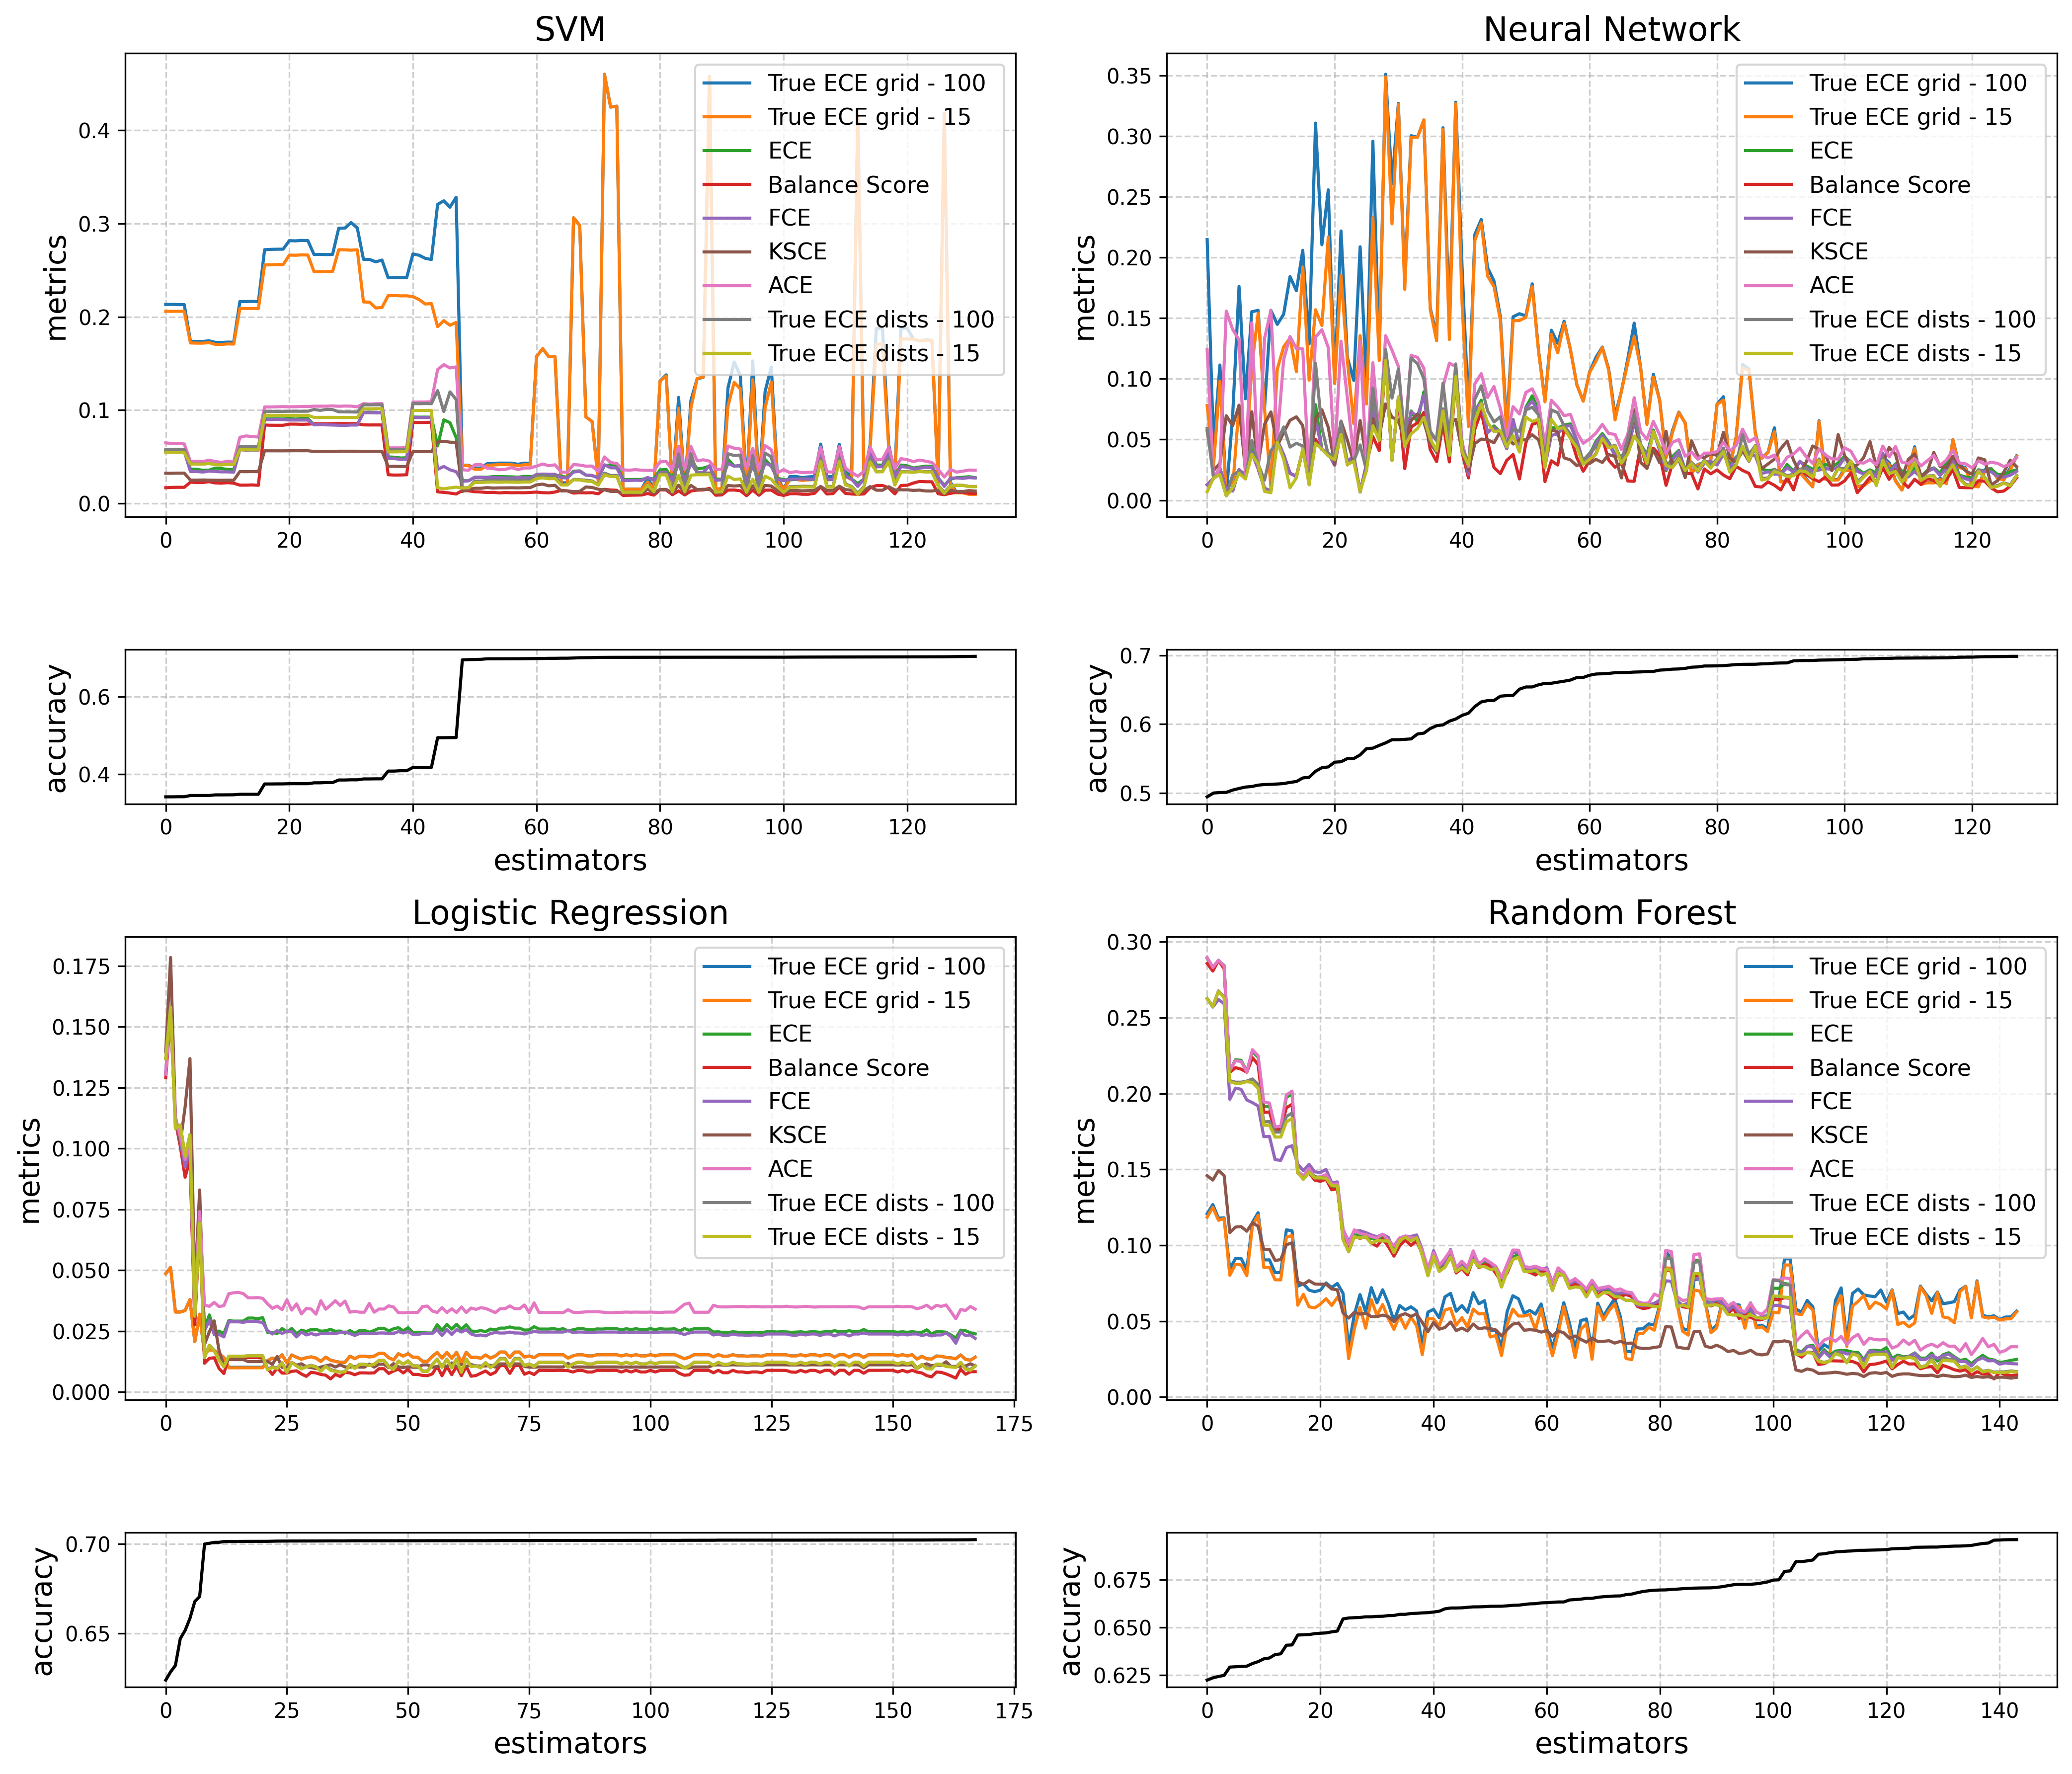

In [49]:
### Plot Exclamation Mark Results (Averaged over seeds)

fig = plt.figure(figsize=(14, 12), dpi=300)
gs = GridSpec(4, 2, height_ratios=[3, 1, 3, 1], figure=fig)

for i, results in enumerate(exclamation_mark_resultss):
    col = i % 2
    base_row = 0 if i < 2 else 2

    # Plot calibration metrics
    ax = fig.add_subplot(gs[base_row, col])
    ax.set_title(models[i], fontsize=16)
    ax.set_ylabel("metrics", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)

    accuracies = np.array(results["Accuracy"])
    indices = np.argsort(accuracies)

    x_values = range(len(results["ECE"]))
    metric_names = list(results.keys())

    for metric_name, metric in results.items():
        if metric_name not in ["TCE", "Accuracy"]:
            if "True ECE" in metric_name:
                metric_name = metric_name.replace("Grid", "grid").replace("Dists", "dists").replace("(Binned ", "").replace(" Bins)", "")
            ax.plot(x_values, metric[indices], label=metric_name)
    ax.legend(fontsize=11)
    
    # Plot accuracy below
    ax_acc = fig.add_subplot(gs[base_row + 1, col])
    ax_acc.plot(x_values, accuracies[indices], color='black')
    ax_acc.set_xlabel("estimators", fontsize=14)
    ax_acc.set_ylabel("accuracy", fontsize=14)
    ax_acc.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.savefig("./plots/grid_search_summary_exclamation_mark")
plt.show()

In [58]:
### Display Mean Absolute Error of Metrics

from sklearn.metrics import mean_absolute_error

experiments = ["SVM - GW", "NN - GW", "LR - GW", "RF - GW", "SVM - EX", "NN - EX", "LR - EX", "RF - EX"]
df_list = []

for i, results in enumerate(gummy_worm_resultss + exclamation_mark_resultss):
    experiment = experiments[i]
    
    true_eces_15 = np.array(results["True ECE Dists (Binned - 15 Bins)"])
    eces = np.array(results["ECE"])
    fces = np.array(results["FCE"])
    aces = np.array(results["ACE"])
    tces = np.array(results["TCE"])
    ksces = np.array(results["KSCE"])
    balance_scores = np.array(results["Balance Score"])
    
    df_list.append({
        "experiment": experiment,
        "ECE": mean_absolute_error(eces, true_eces_15),
        "FCE": mean_absolute_error(fces, true_eces_15),
        "ACE": mean_absolute_error(aces, true_eces_15),
        "TCE": mean_absolute_error(tces, true_eces_15),
        "KSCE": mean_absolute_error(ksces, true_eces_15),
        "Balance Score": mean_absolute_error(balance_scores, true_eces_15),
    })

for i, results in enumerate(gummy_worm_resultss + exclamation_mark_resultss):
    experiment = experiments[i]
    
    true_eces_100 = np.array(results["True ECE Dists (Binned - 100 Bins)"])
    eces = np.array(results["ECE"])
    fces = np.array(results["FCE"])
    aces = np.array(results["ACE"])
    tces = np.array(results["TCE"])
    ksces = np.array(results["KSCE"])
    balance_scores = np.array(results["Balance Score"])
    df_list.append({
        "experiment": experiment,
        "ECE": mean_absolute_error(eces, true_eces_100),
        "FCE": mean_absolute_error(fces, true_eces_100),
        "ACE": mean_absolute_error(aces, true_eces_100),
        "TCE": mean_absolute_error(tces, true_eces_100),
        "KSCE": mean_absolute_error(ksces, true_eces_100),
        "Balance Score": mean_absolute_error(balance_scores, true_eces_100),
    })

In [59]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.DataFrame(df_list)
print(df)

   experiment       ECE       FCE       ACE       TCE      KSCE  Balance Score
0    SVM - GW  0.008259  0.007785  0.041928  0.265759  0.018528       0.011997
1     NN - GW  0.003631  0.004306  0.013652  0.377945  0.019984       0.008399
2     LR - GW  0.007164  0.005401  0.011118  0.113603  0.003816       0.003385
3     RF - GW  0.008415  0.011817  0.007501  0.401718  0.005054       0.001673
4    SVM - EX  0.009425  0.007826  0.018299  0.287772  0.016965       0.013022
5     NN - EX  0.005563  0.004906  0.028399  0.317135  0.014975       0.007251
6     LR - EX  0.013447  0.012284  0.022012  0.097703  0.002052       0.003030
7     RF - EX  0.004497  0.004070  0.008030  0.356375  0.036696       0.003023
8    SVM - GW  0.014260  0.015148  0.030287  0.254021  0.023901       0.022680
9     NN - GW  0.006859  0.007358  0.010181  0.373396  0.020926       0.012973
10    LR - GW  0.006710  0.004943  0.010662  0.113139  0.003454       0.003846
11    RF - GW  0.007431  0.010867  0.006727  0.40062

In [60]:
### Print Latex code for table

model_names = df["experiment"]
data_only = df.drop(columns=["experiment"])

def highlight_row(row):
    ranks = row.rank(method="min", ascending=True)
    formatted = row.astype(str)

    for col in row.index:
        val = row[col]
        if ranks[col] == 1:
            formatted[col] = f"\\textbf{{{val:.5f}}}"
        elif ranks[col] == 2:
            formatted[col] = f"\\underline{{{val:.5f}}}"
        else:
            formatted[col] = f"{val:.5f}"
    return formatted

# Apply formatting row-wise
styled_data = data_only.apply(highlight_row, axis=1)

# Add back the model column
styled_df = pd.concat([model_names, styled_data], axis=1)

latex_code = styled_df.to_latex(index=False, caption="Mean absolute error between True ECE$_{dists}^{15}$ (top section) and True ECE$_{dists}^{15}$ (bottom section) and various metrics. Bold and underlined values indicate top-1 and top-2 values (minimal values), respectively. GW, EX, NN, LR, RF are abbreviations for Gummy Worm, Exclamation Mark, Neural Network, Logistic Regression and Random Forest, respectively.")
print(latex_code)

\begin{table}
\caption{Mean absolute error between True ECE$_{dists}^{15}$ (top section) and True ECE$_{dists}^{15}$ and various metrics. Bold and underlined values indicate top-1 and top-2 values, respectively. GW, EX, NN, LR, RF are abbreviations for Gummy Worm, Exclamation Mark, Neural Network, Logistic Regression and Random Forest, respectively.}
\begin{tabular}{lllllll}
\toprule
experiment & ECE & FCE & ACE & TCE & KSCE & Balance Score \\
\midrule
SVM - GW & \underline{0.00826} & \textbf{0.00778} & 0.04193 & 0.26576 & 0.01853 & 0.01200 \\
NN - GW & \textbf{0.00363} & \underline{0.00431} & 0.01365 & 0.37794 & 0.01998 & 0.00840 \\
LR - GW & 0.00716 & 0.00540 & 0.01112 & 0.11360 & \underline{0.00382} & \textbf{0.00338} \\
RF - GW & 0.00842 & 0.01182 & 0.00750 & 0.40172 & \underline{0.00505} & \textbf{0.00167} \\
SVM - EX & \underline{0.00942} & \textbf{0.00783} & 0.01830 & 0.28777 & 0.01696 & 0.01302 \\
NN - EX & \underline{0.00556} & \textbf{0.00491} & 0.02840 & 0.31713 & 0.01497 & 